In [1]:
import pandas as pd

#Read EgoAlterProfiles.txt
EgoAlterProfiles = pd.read_csv("EgoAlterProfiles.txt",sep="\t")

#Read EgoNetworks.txt
#EgoNetworks = pd.read_csv("EgoNetworks.txt",sep="\t")

#Read EgoTimelines.txt
EgoTimelines = pd.read_csv("EgoTimelines.txt", encoding = 'ISO-8859-1', sep="\t") 

#Read Exposure.txt
#Exposure = pd.read_csv("Exposure.txt",sep="\t")

#Read MANIFEST.txt
#Manifest = pd.read_csv("MANIFEST.txt",sep="\t")


In [2]:
EgoTimelines

,replyto_userid,retweeted_userid,id,tweetid,created_at,hashtags,urls,mentions_ids,retweet_count,egoID,retweetedUserID,replytoUserID,metionID
0,NaN,NaN,398477318,249552537051598848,Sat Sep 22 16:55:35 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
1,NaN,NaN,398477318,249537963145433088,Sat Sep 22 15:57:41 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
2,NaN,NaN,398477318,129377372209299456,Thu Oct 27 02:02:23 +0000 2011,NaN,NaN,NaN,0,1,NaN,NaN,NaN
3,NaN,NaN,398477318,302401054690140160,Fri Feb 15 12:56:44 +0000 2013,NaN,NaN,797583722,0,1,NaN,NaN,1970142
4,NaN,NaN,398477318,249538739611787264,Sat Sep 22 16:00:46 +0000 2012,NaN,NaN,2810549959,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702253,NaN,1.908175e+09,2450373612,457512764609527808,Sat Apr 19 13:35:17 +0000 2014,NaN,NaN,1908174541,116,34003,1665499.0,NaN,1665499
4702254,NaN,1.908175e+09,2450373612,457500823937761280,Sat Apr 19 12:47:51 +0000 2014,NaN,NaN,1908174541,130,34003,1665499.0,NaN,1665499
4702255,NaN,2.741554e+07,2450373612,457581679150780416,Sat Apr 19 18:09:08 +0000 2014,NaN,NaN,27415537,465,34003,2212205.0,NaN,2212205
4702256,1.086140e+09,NaN,2450373612,457174276064284673,Fri Apr 18 15:10:15 +0000 2014,NaN,NaN,"1086139884,1086139884",0,34003,NaN,992318.0,"992318,992318"


In [3]:
Egos = EgoAlterProfiles[EgoAlterProfiles['IsEgo']==True]
Egos_without_nan = Egos.dropna()
#Egos_with_utc = Egos_without_nan[Egos_without_nan['utc_offset']!=0]
Egos_with_tweets = Egos_without_nan[Egos_without_nan['statuses_count']!=0]
#Egos_with_tweets[Egos_with_tweets['protected']==False]

In [4]:
Egos_with_tweets['egoID']=Egos_with_tweets['ID']
Egos_with_tweets

<ipython-input-4-4f5a6461f6e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Egos_with_tweets['egoID']=Egos_with_tweets['ID']


,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at,protected,egoID
1,2,True,2.0,8,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2
6,7,True,17.0,71,1034.0,-10800.0,pt,Thu Nov 11 22:05:15 +0000 2010,True,7
8,9,True,26.0,16,6.0,-10800.0,en,Sun Feb 14 10:49:28 +0000 2010,False,9
11,12,True,36.0,260,257.0,-18000.0,en,Thu Aug 12 04:54:24 +0000 2010,True,12
20,21,True,14.0,21,473.0,-14400.0,en,Thu Apr 30 16:29:40 +0000 2009,False,21
...,...,...,...,...,...,...,...,...,...,...
33938,33939,True,28.0,40,11.0,-18000.0,es,Mon Aug 11 22:44:22 +0000 2014,False,33939
33942,33943,True,15.0,46,12.0,0.0,ru,Sat Jun 14 08:11:33 +0000 2014,False,33943
33967,33968,True,590.0,63,77.0,-14400.0,en,Sun Oct 20 19:02:07 +0000 2013,False,33968
33979,33980,True,120.0,103,409.0,7200.0,tr,Fri Jun 14 20:04:11 +0000 2013,False,33980


In [28]:
dfmerged = Egos_with_tweets.merge(EgoTimelines, on = 'egoID', how = 'outer').fillna(0)


In [29]:
dfmerged_egos = dfmerged[dfmerged['IsEgo']!=0]
dfmerged_filtered = dfmerged_egos[dfmerged_egos['created_at_y']!=0]

In [30]:
dfmerged_reset_ind=dfmerged_filtered.reset_index(drop=True)

date_time_str = dfmerged_filtered['created_at_y'].loc[0]
date_time_obj = datetime.strptime(date_time_str, '%a %b %d %H:%M:%S %z %Y')

dfmerged_filtered['created_at_y'].loc[0] = pd.to_datetime(dfmerged_filtered['created_at_y'].loc[0], format ='%a %b %d %H:%M:%S %z %Y')

dfmerged_filtered['created_at_y'].loc[0]

In [31]:
dfmerged_reset_ind['final_date_time']=0

In [32]:
dfmerged_reset_ind

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at_x,protected,egoID,...,tweetid,created_at_y,hashtags,urls,mentions_ids,retweet_count,retweetedUserID,replytoUserID,metionID,final_date_time
0,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.661832e+17,Wed Nov 07 14:19:48 +0000 2012,0,http://t.co/f4iUVq3i,0,0.0,0.0,0.0,0,0
1,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,1.715688e+17,Mon Feb 20 12:16:02 +0000 2012,0,0,0,0.0,0.0,0.0,0,0
2,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.657009e+17,Tue Nov 06 06:23:18 +0000 2012,0,http://t.co/HPBDRag6,0,0.0,0.0,0.0,0,0
3,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.877150e+09,Mon Jul 27 20:48:55 +0000 2009,0,0,0,0.0,0.0,0.0,0,0
4,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,1.715678e+17,Mon Feb 20 12:12:14 +0000 2012,0,http://t.co/2ElP3Ghw,0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995491,33986.0,True,6.0,8.0,15.0,10800.0,ar,Mon Oct 14 06:17:23 +0000 2013,False,33986,...,3.896412e+17,Mon Oct 14 06:38:01 +0000 2013,0,0,1960007076,1.0,1449103.0,0.0,33986,0
2995492,33986.0,True,6.0,8.0,15.0,10800.0,ar,Mon Oct 14 06:17:23 +0000 2013,False,33986,...,3.896440e+17,Mon Oct 14 06:49:05 +0000 2013,0,0,0,0.0,0.0,1739139.0,0,0
2995493,33986.0,True,6.0,8.0,15.0,10800.0,ar,Mon Oct 14 06:17:23 +0000 2013,False,33986,...,3.896441e+17,Mon Oct 14 06:49:18 +0000 2013,0,0,2517906421,0.0,0.0,1739139.0,0,0
2995494,33986.0,True,6.0,8.0,15.0,10800.0,ar,Mon Oct 14 06:17:23 +0000 2013,False,33986,...,3.896441e+17,Mon Oct 14 06:49:34 +0000 2013,0,0,0,0.0,0.0,1739139.0,0,0


In [33]:
dfmerged_concise=dfmerged_reset_ind.drop(columns=['IsEgo', 'followers_count','friends_count','statuses_count','lang','protected','tweetid','hashtags','urls','mentions_ids','retweet_count','retweetedUserID','replytoUserID','metionID','replyto_userid','retweeted_userid','id'])

In [74]:
dfmerged_concise

,ID,utc_offset,created_at_x,egoID,created_at_y,final_date_time
0,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Wed Nov 07 14:19:48 +0000 2012,"(3, 10.0)"
1,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Feb 20 12:16:02 +0000 2012,0
2,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Tue Nov 06 06:23:18 +0000 2012,0
3,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Jul 27 20:48:55 +0000 2009,0
4,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,Mon Feb 20 12:12:14 +0000 2012,0
...,...,...,...,...,...,...
2995491,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:38:01 +0000 2013,0
2995492,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:05 +0000 2013,0
2995493,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:18 +0000 2013,0
2995494,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:34 +0000 2013,0


In [85]:
def slicing(input_date, input_utc):
    try:
        offset = input_utc/3600
        hour = int(input_date[11:13])+offset
        wkday = str(input_date[:3])
        #print(wkday)
        wkday_list = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
        
        for i in range(len(wkday_list)):
            if wkday == wkday_list[i]:
                wkday = i 
                break
            
        if hour>=24:
            wkday = wkday+1
            hour = hour-24
            if wkday>6:
                wkday=0
            
        elif hour<0:
            wkday = wkday-1
            hour = hour+24
            if wkday<0:
                wkday=6
        #print(wkday, hour)
        my_date = int(wkday), int(hour)
    except ValueError:
        my_date = None
    return my_date

In [88]:
import numpy as np
import matplotlib.pyplot as plt

array=[]
array_fig = np.zeros((7,24))

for i in range(len(dfmerged_concise)):
    Day, Hour = slicing(dfmerged_concise['created_at_y'].loc[i],dfmerged_concise['utc_offset'].loc[i])
    ID = dfmerged_concise['egoID'].loc[i]
    array.append([ID, Day, Hour])
    
    array_fig[Day][Hour] = array_fig[Day][Hour] + 1

IndexError: index 2995495 is out of bounds for axis 0 with size 7

In [102]:
array_fig

array([[20524., 15205., 11784.,  8851.,  6829.,  6428.,  7026.,  9120.,
        10655., 13172., 16016., 18227., 20314., 20866., 21011., 21503.,
        21877., 22385., 24211., 25634., 28564., 30938., 30548., 27459.],
       [21095., 14324.,  9246.,  7094.,  6397.,  7087.,  8314., 11690.,
        13945., 14866., 16543., 17273., 18713., 18886., 19505., 19759.,
        20883., 21901., 24240., 26758., 28842., 31673., 29868., 26698.],
       [20191., 12980.,  9065.,  6733.,  5908.,  6957.,  8529., 11794.,
        13882., 15561., 17128., 18224., 19906., 19261., 19070., 19936.,
        21268., 21916., 23180., 25684., 28117., 30191., 30158., 26615.],
       [20253., 13326.,  8748.,  7016.,  6473.,  7277.,  8813., 11572.,
        13928., 15485., 17014., 18403., 20191., 19513., 20045., 20606.,
        21023., 22008., 23182., 25237., 28474., 30930., 30648., 27068.],
       [19871., 13610.,  9849.,  7012.,  6186.,  6780.,  8872., 11531.,
        14219., 16106., 17225., 17988., 19676., 19066., 1922

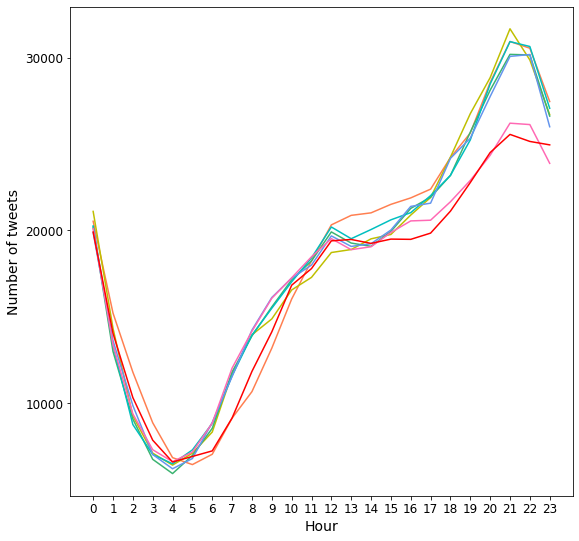

In [123]:
import matplotlib.pyplot as plt

#Plot time against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
y=[0,30000]
plt.yticks(np.arange(min(y), max(y)+1, 10000))
x = list(range(24))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink','r'] #set range of colours

for k in range(len(array_fig)):
    plt.plot(x,array_fig[k], color=colors[k])


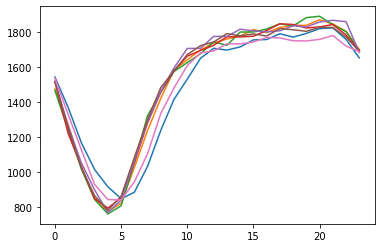

In [156]:
#from collections import OrderedDict
#array_unique = OrderedDict((tuple(x), x) for x in array).values()
array_unique_fig = np.zeros((7,24))
array_unique = list(set(map(tuple, array)))

for i in range(len(array_unique)):
    Day = array_unique[i][1]
    Hour = array_unique[i][2]
    array_unique_fig[Day][Hour] = array_unique_fig[Day][Hour] + 1

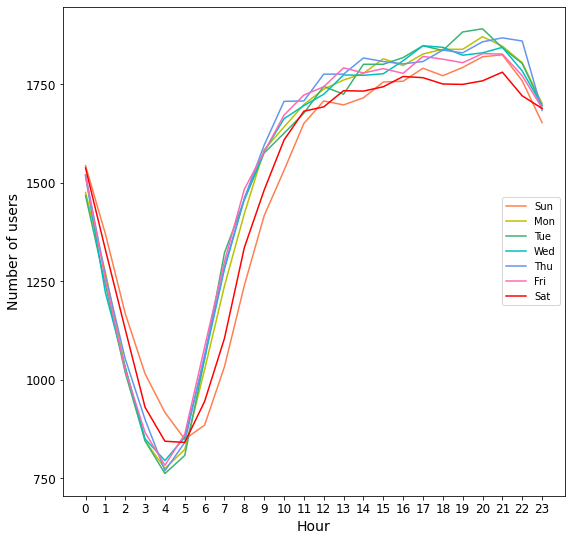

In [168]:
#Plot time against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of users', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
y=[750,1750]
plt.yticks(np.arange(min(y), max(y)+1, 250))
x = list(range(24))
plt.xticks(np.arange(min(x), max(x)+1, 1.0))

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink','r'] #set range of colours
labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri','Sat']
for k in range(len(array_unique_fig)):
    plt.plot(x,array_unique_fig[k],color=colors[k],label=labels[k])
    
plt.legend(loc='center right')


In [145]:
len(OrderedDict((tuple(x), x) for x in array).values())


254223

In [153]:
list(set(map(tuple, array)))[0][0]


30199

In [150]:
list[0]

TypeError: 'type' object is not subscriptable

In [27]:
dfmerged_concise

,ID,utc_offset,created_at_x,egoID,created_at_y,final_date_time
0,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,2012-11-07 14:19:48+00:00,2012-11-07 10:19:48+00:00
1,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,2012-02-20 12:16:02+00:00,2012-02-20 08:16:02+00:00
2,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,2012-11-06 06:23:18+00:00,2012-11-06 02:23:18+00:00
3,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,2009-07-27 20:48:55+00:00,2009-07-27 16:48:55+00:00
4,2.0,-14400.0,Mon Jul 27 20:46:32 +0000 2009,2,2012-02-20 12:12:14+00:00,2012-02-20 08:12:14+00:00
...,...,...,...,...,...,...
2995491,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:38:01 +0000 2013,0
2995492,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:05 +0000 2013,0
2995493,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:18 +0000 2013,0
2995494,33986.0,10800.0,Mon Oct 14 06:17:23 +0000 2013,33986,Mon Oct 14 06:49:34 +0000 2013,0


In [18]:
from datetime import datetime
from datetime import timedelta
for i in range(len(dfmerged_concise)):
    delta_i = timedelta(seconds = dfmerged_concise['utc_offset'].loc[i])
    dfmerged_concise['created_at_y'].loc[i] = pd.to_datetime(dfmerged_concise['created_at_y'].loc[i], format ='%a %b %d %H:%M:%S %z %Y')
    #date_time_str = dfmerged_filtered['created_at_y'].loc[i]
    #date_time_obj = datetime.strptime(date_time_str, '%a %b %d %H:%M:%S %z %Y')
    dfmerged_concise['final_date_time'].loc[i] = dfmerged_concise['created_at_y'].loc[i] + delta_i
    print(i, dfmerged_concise['final_date_time'].loc[i])

0 2012-11-07 10:19:48+00:00
1 2012-02-20 08:16:02+00:00
2 2012-11-06 02:23:18+00:00
3 2009-07-27 16:48:55+00:00
4 2012-02-20 08:12:14+00:00
5 2012-08-20 08:15:35+00:00
6 2014-01-06 15:59:23+00:00
7 2011-06-14 04:54:35+00:00
8 2010-02-26 07:46:47+00:00
9 2010-02-23 12:58:50+00:00
10 2010-02-14 20:29:33+00:00
11 2010-02-14 15:46:26+00:00
12 2011-09-13 16:49:29+00:00
13 2012-08-27 19:38:11+00:00
14 2014-07-06 13:06:22+00:00
15 2014-04-28 18:21:27+00:00
16 2014-05-10 13:16:35+00:00
17 2014-04-19 18:12:23+00:00
18 2014-02-20 15:39:17+00:00
19 2014-01-21 19:11:21+00:00
20 2013-02-26 10:08:57+00:00
21 2012-10-29 16:17:35+00:00
22 2012-10-16 19:20:36+00:00
23 2012-06-12 06:33:57+00:00
24 2013-07-02 09:46:57+00:00
25 2014-10-12 15:42:51+00:00
26 2014-09-27 10:59:46+00:00
27 2014-08-29 11:16:24+00:00
28 2014-07-17 15:12:49+00:00
29 2014-05-10 08:38:21+00:00
30 2013-10-30 21:41:12+00:00
31 2013-05-07 18:51:56+00:00
32 2012-11-21 16:38:22+00:00
33 2012-11-17 22:05:28+00:00
34 2012-09-09 15:52:33+0

278 2014-08-04 17:20:23+00:00
279 2014-01-05 11:05:08+00:00
280 2013-01-07 19:50:04+00:00
281 2012-11-08 20:07:57+00:00
282 2012-06-02 11:15:49+00:00
283 2014-02-15 18:54:59+00:00
284 2012-12-17 17:49:16+00:00
285 2012-11-23 20:23:58+00:00
286 2014-03-29 11:56:49+00:00
287 2013-11-20 12:30:33+00:00
288 2014-05-26 17:45:52+00:00
289 2012-11-15 21:09:49+00:00
290 2014-06-18 17:58:26+00:00
291 2012-06-07 16:41:08+00:00
292 2014-02-14 07:42:00+00:00
293 2013-04-21 08:20:08+00:00
294 2014-02-15 18:53:29+00:00
295 2014-01-31 16:21:47+00:00
296 2013-08-10 09:51:21+00:00
297 2012-07-24 18:59:51+00:00
298 2014-06-19 16:26:25+00:00
299 2014-05-04 15:58:54+00:00
300 2013-06-02 20:25:45+00:00
301 2014-02-23 19:44:46+00:00
302 2012-08-16 16:17:24+00:00
303 2014-03-10 16:56:46+00:00
304 2013-10-30 21:54:03+00:00
305 2013-05-02 18:44:01+00:00
306 2012-06-24 11:42:11+00:00
307 2012-08-01 13:37:35+00:00
308 2014-04-19 13:50:57+00:00
309 2013-05-02 18:05:27+00:00
310 2012-06-24 19:07:36+00:00
311 2012-0

553 2013-10-18 09:10:34+00:00
554 2013-10-15 07:54:41+00:00
555 2013-10-13 19:20:55+00:00
556 2013-10-09 21:56:27+00:00
557 2013-10-05 14:38:46+00:00
558 2013-09-28 14:46:15+00:00
559 2013-09-27 07:03:22+00:00
560 2013-09-24 13:42:04+00:00
561 2013-08-19 21:29:46+00:00
562 2013-08-05 11:15:54+00:00
563 2013-08-05 11:13:36+00:00
564 2013-07-02 13:07:50+00:00
565 2013-06-23 15:58:08+00:00
566 2013-06-04 19:22:06+00:00
567 2013-05-21 21:41:12+00:00
568 2013-05-20 22:20:31+00:00
569 2013-05-19 15:29:28+00:00
570 2013-05-08 22:22:45+00:00
571 2013-05-07 23:20:52+00:00
572 2013-05-07 22:51:26+00:00
573 2013-05-05 13:20:16+00:00
574 2013-04-07 15:10:42+00:00
575 2013-04-07 08:43:31+00:00
576 2013-04-02 23:40:15+00:00
577 2013-04-02 23:23:55+00:00
578 2013-03-31 23:22:44+00:00
579 2013-03-16 18:15:02+00:00
580 2013-02-24 13:44:44+00:00
581 2013-02-15 00:37:21+00:00
582 2013-02-06 08:07:51+00:00
583 2013-02-05 22:22:35+00:00
584 2013-02-05 08:47:09+00:00
585 2013-02-04 23:52:11+00:00
586 2013-0

829 2014-02-27 00:41:33+00:00
830 2014-02-25 22:47:37+00:00
831 2014-02-17 01:35:10+00:00
832 2014-02-16 13:45:57+00:00
833 2014-02-13 01:09:18+00:00
834 2014-02-11 00:52:22+00:00
835 2014-02-09 17:51:11+00:00
836 2014-02-09 17:09:03+00:00
837 2014-02-08 13:12:40+00:00
838 2014-02-08 13:02:55+00:00
839 2014-02-06 00:37:31+00:00
840 2014-01-28 23:46:30+00:00
841 2014-01-28 23:30:25+00:00
842 2014-01-28 01:13:32+00:00
843 2014-01-25 01:50:29+00:00
844 2014-01-21 20:00:32+00:00
845 2014-01-20 20:45:17+00:00
846 2014-01-20 00:31:07+00:00
847 2014-01-19 04:32:10+00:00
848 2014-01-15 23:36:10+00:00
849 2014-01-08 23:50:25+00:00
850 2014-01-08 01:36:09+00:00
851 2014-01-05 20:16:43+00:00
852 2014-01-05 00:42:53+00:00
853 2014-01-04 00:01:56+00:00
854 2014-01-04 00:00:15+00:00
855 2014-01-03 00:31:11+00:00
856 2014-01-01 18:59:23+00:00
857 2014-01-01 18:57:05+00:00
858 2014-01-01 14:09:46+00:00
859 2013-12-30 15:51:16+00:00
860 2013-12-25 22:53:46+00:00
861 2013-12-24 13:30:23+00:00
862 2013-1

1099 2013-03-26 07:51:15+00:00
1100 2013-03-25 09:19:39+00:00
1101 2013-03-25 01:43:05+00:00
1102 2013-03-24 19:32:31+00:00
1103 2013-03-24 17:06:00+00:00
1104 2013-03-24 13:20:30+00:00
1105 2013-03-23 23:31:22+00:00
1106 2013-03-23 18:35:48+00:00
1107 2013-03-22 06:37:23+00:00
1108 2013-03-21 09:13:22+00:00
1109 2013-03-21 00:39:13+00:00
1110 2013-03-20 14:35:47+00:00
1111 2013-03-19 09:26:42+00:00
1112 2013-03-18 08:23:04+00:00
1113 2013-03-18 08:03:56+00:00
1114 2013-03-18 00:16:27+00:00
1115 2013-03-18 00:11:04+00:00
1116 2013-03-18 00:00:27+00:00
1117 2013-03-17 23:27:56+00:00
1118 2013-03-17 23:26:48+00:00
1119 2013-03-17 12:31:22+00:00
1120 2013-03-16 23:31:39+00:00
1121 2013-03-16 23:26:07+00:00
1122 2013-03-15 22:58:24+00:00
1123 2013-03-15 08:16:14+00:00
1124 2013-03-14 09:12:20+00:00
1125 2013-03-13 21:44:13+00:00
1126 2013-03-13 08:51:28+00:00
1127 2013-03-13 08:45:27+00:00
1128 2013-03-13 00:46:51+00:00
1129 2013-03-13 00:15:46+00:00
1130 2013-03-11 22:53:06+00:00
1131 201

1365 2012-11-09 11:25:03+00:00
1366 2012-11-09 02:54:22+00:00
1367 2012-11-08 19:29:26+00:00
1368 2012-11-08 19:28:44+00:00
1369 2012-11-08 19:28:24+00:00
1370 2012-11-08 07:30:33+00:00
1371 2012-11-07 13:11:53+00:00
1372 2012-11-07 00:35:58+00:00
1373 2012-11-07 00:18:47+00:00
1374 2012-11-07 00:16:30+00:00
1375 2012-11-07 00:09:56+00:00
1376 2012-11-06 23:15:23+00:00
1377 2012-11-06 22:36:19+00:00
1378 2012-11-05 23:16:12+00:00
1379 2012-11-05 23:03:08+00:00
1380 2012-11-05 22:58:51+00:00
1381 2012-11-05 21:15:53+00:00
1382 2012-11-05 08:59:29+00:00
1383 2012-11-05 00:21:43+00:00
1384 2012-11-05 00:17:54+00:00
1385 2012-11-04 13:55:50+00:00
1386 2012-11-02 22:08:00+00:00
1387 2012-11-02 08:12:23+00:00
1388 2012-11-02 08:08:58+00:00
1389 2012-10-31 21:09:35+00:00
1390 2012-10-31 21:01:10+00:00
1391 2012-10-31 14:21:36+00:00
1392 2012-10-28 20:01:36+00:00
1393 2012-10-28 18:17:12+00:00
1394 2012-10-28 18:14:40+00:00
1395 2012-10-27 18:43:19+00:00
1396 2012-10-27 11:33:33+00:00
1397 201

1630 2012-08-04 17:44:23+00:00
1631 2012-08-04 11:03:59+00:00
1632 2012-08-04 10:58:09+00:00
1633 2012-08-04 10:31:50+00:00
1634 2012-08-03 22:24:53+00:00
1635 2012-08-03 21:39:55+00:00
1636 2012-08-03 21:20:26+00:00
1637 2012-08-03 14:46:02+00:00
1638 2012-08-03 14:29:50+00:00
1639 2012-08-03 10:30:49+00:00
1640 2012-08-03 06:58:54+00:00
1641 2012-08-03 01:05:46+00:00
1642 2012-08-02 08:02:34+00:00
1643 2012-08-01 23:17:37+00:00
1644 2012-08-01 23:14:26+00:00
1645 2012-08-01 22:47:13+00:00
1646 2012-07-30 20:05:43+00:00
1647 2012-07-30 07:52:59+00:00
1648 2012-07-29 23:28:32+00:00
1649 2012-07-29 22:20:50+00:00
1650 2012-07-29 22:18:38+00:00
1651 2012-07-28 01:14:29+00:00
1652 2012-07-27 16:12:52+00:00
1653 2012-07-27 16:11:05+00:00
1654 2012-07-27 07:11:48+00:00
1655 2012-07-27 07:10:47+00:00
1656 2012-07-27 06:56:41+00:00
1657 2012-07-26 20:09:31+00:00
1658 2012-07-26 07:48:58+00:00
1659 2012-07-26 07:42:47+00:00
1660 2012-07-26 07:35:52+00:00
1661 2012-07-26 00:15:49+00:00
1662 201

1897 2012-05-21 13:03:51+00:00
1898 2012-05-21 07:26:24+00:00
1899 2012-05-20 17:47:14+00:00
1900 2012-05-20 16:21:42+00:00
1901 2012-05-20 15:53:26+00:00
1902 2012-05-20 15:50:02+00:00
1903 2012-05-20 00:34:27+00:00
1904 2012-05-20 00:27:17+00:00
1905 2012-05-20 00:17:50+00:00
1906 2012-05-19 22:42:25+00:00
1907 2012-05-19 11:12:09+00:00
1908 2012-05-19 10:59:45+00:00
1909 2012-05-19 10:00:22+00:00
1910 2012-05-19 02:37:53+00:00
1911 2012-05-19 02:34:26+00:00
1912 2012-05-18 13:18:57+00:00
1913 2012-05-18 07:51:33+00:00
1914 2012-05-17 23:51:22+00:00
1915 2012-05-17 22:13:13+00:00
1916 2012-05-17 14:32:12+00:00
1917 2012-05-17 13:38:48+00:00
1918 2012-05-15 21:28:31+00:00
1919 2012-05-14 21:32:03+00:00
1920 2012-05-14 15:40:09+00:00
1921 2012-05-13 23:09:14+00:00
1922 2012-05-13 22:29:17+00:00
1923 2012-05-13 20:58:04+00:00
1924 2012-05-13 18:09:11+00:00
1925 2012-05-12 17:53:42+00:00
1926 2012-05-12 11:11:27+00:00
1927 2012-05-12 01:32:35+00:00
1928 2012-05-11 21:21:07+00:00
1929 201

2162 2014-01-07 11:39:04+00:00
2163 2014-03-26 08:57:45+00:00
2164 2014-05-05 00:59:29+00:00
2165 2012-12-12 11:02:03+00:00
2166 2012-11-21 00:07:59+00:00
2167 2012-12-27 00:23:39+00:00
2168 2013-08-15 09:02:37+00:00
2169 2012-05-03 18:02:55+00:00
2170 2012-08-18 15:03:46+00:00
2171 2012-10-11 15:09:32+00:00
2172 2012-04-18 21:43:25+00:00
2173 2012-04-19 13:20:03+00:00
2174 2012-06-20 14:24:26+00:00
2175 2012-06-13 14:01:36+00:00
2176 2013-04-26 06:47:15+00:00
2177 2012-08-20 07:51:02+00:00
2178 2012-10-09 00:15:30+00:00
2179 2012-05-27 22:44:03+00:00
2180 2014-05-01 21:32:26+00:00
2181 2012-05-08 21:39:33+00:00
2182 2012-08-02 06:28:17+00:00
2183 2012-03-27 23:21:32+00:00
2184 2014-02-24 22:15:20+00:00
2185 2012-07-28 13:39:51+00:00
2186 2014-05-03 00:15:05+00:00
2187 2013-12-09 00:29:33+00:00
2188 2012-06-02 02:19:53+00:00
2189 2013-09-17 22:31:36+00:00
2190 2012-03-24 15:51:07+00:00
2191 2013-05-15 13:27:00+00:00
2192 2013-11-14 15:58:39+00:00
2193 2012-11-14 20:41:25+00:00
2194 201

2429 2012-04-28 19:06:49+00:00
2430 2012-03-11 17:57:55+00:00
2431 2012-05-02 13:51:42+00:00
2432 2014-02-15 00:56:54+00:00
2433 2013-02-04 09:23:07+00:00
2434 2013-04-30 21:41:35+00:00
2435 2013-11-02 23:31:13+00:00
2436 2012-08-17 18:00:17+00:00
2437 2014-05-15 08:16:23+00:00
2438 2013-01-14 00:27:31+00:00
2439 2013-06-12 22:09:25+00:00
2440 2012-09-11 07:45:33+00:00
2441 2012-10-14 02:07:29+00:00
2442 2014-02-10 00:52:06+00:00
2443 2014-10-28 00:08:28+00:00
2444 2013-04-17 07:57:42+00:00
2445 2013-06-19 21:31:31+00:00
2446 2013-02-01 07:30:43+00:00
2447 2012-12-09 13:12:37+00:00
2448 2014-10-22 08:22:18+00:00
2449 2014-10-27 09:04:27+00:00
2450 2013-04-10 20:19:23+00:00
2451 2014-04-28 23:07:39+00:00
2452 2012-04-06 23:50:47+00:00
2453 2013-03-01 08:25:36+00:00
2454 2012-03-15 11:37:47+00:00
2455 2013-04-28 08:59:20+00:00
2456 2012-11-16 12:30:17+00:00
2457 2013-03-06 23:50:13+00:00
2458 2012-11-16 06:07:11+00:00
2459 2012-12-09 13:12:34+00:00
2460 2013-05-07 20:03:03+00:00
2461 201

2695 2014-05-22 08:06:41+00:00
2696 2012-04-03 17:31:11+00:00
2697 2012-04-03 17:40:23+00:00
2698 2012-04-19 13:33:49+00:00
2699 2012-04-22 21:45:50+00:00
2700 2012-07-31 11:30:58+00:00
2701 2012-09-15 11:48:18+00:00
2702 2012-08-15 23:12:35+00:00
2703 2013-11-21 09:10:13+00:00
2704 2012-04-22 21:59:14+00:00
2705 2012-03-26 21:42:32+00:00
2706 2013-01-21 23:49:58+00:00
2707 2012-05-10 21:28:15+00:00
2708 2012-04-28 19:08:37+00:00
2709 2012-05-10 21:41:18+00:00
2710 2012-05-06 14:22:26+00:00
2711 2012-05-10 21:25:21+00:00
2712 2013-03-28 09:40:43+00:00
2713 2014-01-23 20:45:04+00:00
2714 2014-10-21 19:24:47+00:00
2715 2012-03-19 23:16:30+00:00
2716 2012-03-19 22:15:27+00:00
2717 2013-09-08 12:32:19+00:00
2718 2013-09-09 22:49:18+00:00
2719 2013-09-08 12:22:44+00:00
2720 2014-01-05 00:13:57+00:00
2721 2014-01-25 02:23:32+00:00
2722 2014-01-20 22:31:05+00:00
2723 2013-10-05 14:37:53+00:00
2724 2014-07-08 20:01:50+00:00
2725 2012-07-03 14:40:45+00:00
2726 2012-05-28 23:29:20+00:00
2727 201

2964 2012-06-06 22:06:23+00:00
2965 2013-01-11 07:14:58+00:00
2966 2012-11-28 08:55:57+00:00
2967 2012-05-16 10:32:46+00:00
2968 2013-05-24 07:08:29+00:00
2969 2012-05-23 22:59:13+00:00
2970 2013-01-09 08:59:29+00:00
2971 2012-05-31 22:06:04+00:00
2972 2012-03-18 01:42:27+00:00
2973 2014-01-19 14:14:01+00:00
2974 2012-05-26 10:29:29+00:00
2975 2012-05-14 21:47:00+00:00
2976 2012-10-09 23:51:35+00:00
2977 2012-11-30 18:46:25+00:00
2978 2012-05-12 23:39:26+00:00
2979 2012-05-26 10:34:10+00:00
2980 2012-07-09 08:24:54+00:00
2981 2012-06-28 07:29:27+00:00
2982 2013-01-14 00:46:04+00:00
2983 2013-01-03 20:11:10+00:00
2984 2012-05-17 01:30:11+00:00
2985 2012-05-22 23:17:05+00:00
2986 2012-04-21 15:08:35+00:00
2987 2013-11-26 23:49:34+00:00
2988 2012-04-26 13:03:03+00:00
2989 2013-03-03 18:03:51+00:00
2990 2012-04-18 21:56:22+00:00
2991 2012-06-06 22:08:40+00:00
2992 2012-05-23 21:10:04+00:00
2993 2012-04-01 23:09:56+00:00
2994 2012-04-04 07:25:35+00:00
2995 2012-05-25 00:05:34+00:00
2996 201

3229 2012-08-08 19:02:14+00:00
3230 2014-04-24 20:31:01+00:00
3231 2012-08-01 21:58:17+00:00
3232 2014-04-02 21:26:36+00:00
3233 2012-08-28 11:53:34+00:00
3234 2013-04-12 15:45:49+00:00
3235 2012-07-01 09:17:05+00:00
3236 2014-04-24 20:45:51+00:00
3237 2012-08-03 22:04:24+00:00
3238 2012-05-19 02:41:11+00:00
3239 2012-06-06 21:39:17+00:00
3240 2012-04-18 13:54:01+00:00
3241 2012-07-22 23:32:17+00:00
3242 2012-07-21 04:38:22+00:00
3243 2014-04-26 13:00:29+00:00
3244 2012-08-01 22:14:00+00:00
3245 2012-08-17 06:56:31+00:00
3246 2012-08-08 23:20:52+00:00
3247 2012-07-14 12:39:02+00:00
3248 2014-04-24 20:12:11+00:00
3249 2012-08-10 16:01:51+00:00
3250 2012-03-11 23:56:12+00:00
3251 2012-07-08 23:17:35+00:00
3252 2013-04-14 23:03:20+00:00
3253 2014-05-12 23:45:55+00:00
3254 2012-08-28 11:53:00+00:00
3255 2014-05-13 01:04:19+00:00
3256 2012-08-03 01:32:14+00:00
3257 2012-05-21 13:05:09+00:00
3258 2012-04-19 23:43:10+00:00
3259 2012-05-21 21:40:13+00:00
3260 2012-09-08 14:27:22+00:00
3261 201

3494 2012-07-26 20:14:53+00:00
3495 2012-10-03 06:50:03+00:00
3496 2012-10-15 00:07:40+00:00
3497 2012-03-10 02:16:09+00:00
3498 2014-05-11 11:20:15+00:00
3499 2012-09-15 13:47:38+00:00
3500 2014-04-09 22:07:20+00:00
3501 2012-10-03 23:13:49+00:00
3502 2012-08-01 07:59:19+00:00
3503 2013-01-30 09:19:36+00:00
3504 2014-05-16 15:39:56+00:00
3505 2012-09-12 09:06:08+00:00
3506 2012-07-28 13:40:20+00:00
3507 2012-04-18 21:26:17+00:00
3508 2013-03-26 08:05:24+00:00
3509 2014-03-25 09:12:18+00:00
3510 2012-10-01 07:59:17+00:00
3511 2014-02-27 23:49:14+00:00
3512 2013-05-05 09:53:56+00:00
3513 2014-03-20 09:00:57+00:00
3514 2012-05-11 20:33:20+00:00
3515 2014-05-18 14:58:17+00:00
3516 2012-03-27 23:22:57+00:00
3517 2012-05-27 22:24:45+00:00
3518 2012-10-18 00:18:11+00:00
3519 2013-04-23 21:21:22+00:00
3520 2012-06-07 21:06:37+00:00
3521 2014-01-20 16:02:44+00:00
3522 2013-09-11 20:03:14+00:00
3523 2012-04-26 22:31:24+00:00
3524 2014-04-22 19:10:37+00:00
3525 2012-08-01 07:53:43+00:00
3526 201

3761 2012-06-22 10:20:22+00:00
3762 2012-06-17 08:58:56+00:00
3763 2012-06-15 06:46:18+00:00
3764 2012-06-13 17:37:38+00:00
3765 2012-06-13 17:36:31+00:00
3766 2012-06-13 12:31:59+00:00
3767 2012-06-07 19:11:32+00:00
3768 2012-06-07 19:09:08+00:00
3769 2012-05-31 16:19:43+00:00
3770 2012-05-25 18:00:19+00:00
3771 2012-05-23 15:39:01+00:00
3772 2012-05-22 18:33:24+00:00
3773 2012-05-22 18:29:50+00:00
3774 2012-05-22 18:19:22+00:00
3775 2012-05-22 16:21:33+00:00
3776 2012-05-22 08:55:43+00:00
3777 2012-05-17 11:33:54+00:00
3778 2012-05-16 17:36:09+00:00
3779 2012-05-16 17:34:30+00:00
3780 2012-05-05 18:29:58+00:00
3781 2012-03-01 07:17:57+00:00
3782 2012-02-28 13:48:32+00:00
3783 2012-02-28 13:48:28+00:00
3784 2012-02-07 12:22:23+00:00
3785 2012-02-07 12:13:21+00:00
3786 2012-02-02 15:22:16+00:00
3787 2012-01-30 17:21:54+00:00
3788 2012-01-24 17:10:05+00:00
3789 2012-01-24 17:02:53+00:00
3790 2012-01-03 17:46:53+00:00
3791 2012-01-03 17:41:11+00:00
3792 2011-11-14 05:50:23+00:00
3793 201

4027 2011-02-25 12:34:08+00:00
4028 2011-02-25 11:48:08+00:00
4029 2011-02-25 11:36:53+00:00
4030 2011-02-25 10:38:54+00:00
4031 2011-02-25 10:24:00+00:00
4032 2011-02-24 11:29:37+00:00
4033 2011-02-24 08:28:22+00:00
4034 2011-02-24 08:12:34+00:00
4035 2011-02-24 07:44:00+00:00
4036 2011-02-24 07:32:42+00:00
4037 2011-02-24 07:21:46+00:00
4038 2011-02-23 15:21:33+00:00
4039 2011-02-21 05:47:00+00:00
4040 2011-02-20 15:02:29+00:00
4041 2011-02-20 13:43:22+00:00
4042 2011-02-20 13:40:26+00:00
4043 2011-02-18 07:37:32+00:00
4044 2011-02-18 05:49:23+00:00
4045 2011-02-18 05:45:34+00:00
4046 2011-02-18 04:02:10+00:00
4047 2011-02-17 11:56:42+00:00
4048 2011-02-17 05:47:25+00:00
4049 2011-02-17 05:09:53+00:00
4050 2011-02-16 16:11:47+00:00
4051 2011-02-16 09:14:40+00:00
4052 2011-02-16 04:45:42+00:00
4053 2011-02-16 03:52:27+00:00
4054 2011-02-16 03:23:37+00:00
4055 2011-02-16 03:20:32+00:00
4056 2011-02-16 03:19:57+00:00
4057 2011-02-16 03:17:49+00:00
4058 2011-02-16 03:16:20+00:00
4059 201

4293 2011-01-19 10:38:11+00:00
4294 2011-01-19 10:36:41+00:00
4295 2011-01-19 10:35:59+00:00
4296 2011-01-19 10:32:34+00:00
4297 2011-01-19 10:30:25+00:00
4298 2011-01-19 06:53:21+00:00
4299 2011-01-19 06:01:45+00:00
4300 2011-01-19 05:33:15+00:00
4301 2011-01-19 05:23:08+00:00
4302 2011-01-18 18:22:29+00:00
4303 2011-01-18 18:10:30+00:00
4304 2011-01-18 17:00:20+00:00
4305 2011-01-18 16:27:56+00:00
4306 2011-01-18 16:27:07+00:00
4307 2011-01-17 12:02:47+00:00
4308 2011-01-17 11:31:19+00:00
4309 2011-01-16 08:27:39+00:00
4310 2011-01-16 08:12:40+00:00
4311 2011-01-16 07:46:43+00:00
4312 2011-01-16 07:40:50+00:00
4313 2011-01-16 07:38:19+00:00
4314 2011-01-16 07:16:47+00:00
4315 2011-01-16 06:24:51+00:00
4316 2011-01-15 08:24:20+00:00
4317 2011-01-15 07:16:32+00:00
4318 2011-01-14 05:09:16+00:00
4319 2011-01-14 04:48:20+00:00
4320 2011-01-14 04:42:56+00:00
4321 2011-01-14 04:22:29+00:00
4322 2011-01-14 04:11:39+00:00
4323 2011-01-14 04:10:01+00:00
4324 2011-01-14 03:41:48+00:00
4325 201

4559 2010-12-20 14:19:31+00:00
4560 2010-12-20 14:12:15+00:00
4561 2010-12-20 13:36:18+00:00
4562 2010-12-20 13:35:11+00:00
4563 2010-12-20 13:34:33+00:00
4564 2010-12-20 13:22:18+00:00
4565 2010-12-20 13:15:45+00:00
4566 2010-12-20 13:09:58+00:00
4567 2010-12-20 12:51:20+00:00
4568 2010-12-20 12:49:42+00:00
4569 2010-12-20 12:44:18+00:00
4570 2010-12-20 12:41:04+00:00
4571 2010-12-20 12:01:55+00:00
4572 2010-12-20 11:09:50+00:00
4573 2010-12-20 11:09:43+00:00
4574 2010-12-20 03:39:44+00:00
4575 2010-12-20 03:20:44+00:00
4576 2010-12-20 03:20:27+00:00
4577 2010-12-19 16:55:43+00:00
4578 2010-12-19 16:44:46+00:00
4579 2010-12-19 16:01:59+00:00
4580 2010-12-19 14:58:50+00:00
4581 2010-12-19 14:37:59+00:00
4582 2010-12-19 14:26:53+00:00
4583 2010-12-19 14:21:53+00:00
4584 2010-12-19 10:03:41+00:00
4585 2010-12-19 10:01:11+00:00
4586 2010-12-19 09:56:58+00:00
4587 2010-12-19 09:53:34+00:00
4588 2010-12-18 17:39:08+00:00
4589 2010-12-18 11:22:09+00:00
4590 2010-12-18 10:57:59+00:00
4591 201

4827 2010-10-25 03:27:45+00:00
4828 2010-10-25 03:21:18+00:00
4829 2010-10-25 03:20:53+00:00
4830 2010-10-25 03:17:31+00:00
4831 2010-10-25 03:17:01+00:00
4832 2010-10-25 03:14:50+00:00
4833 2010-10-25 03:13:28+00:00
4834 2010-10-25 03:12:55+00:00
4835 2010-10-25 03:09:05+00:00
4836 2010-10-25 03:08:39+00:00
4837 2010-10-25 03:04:29+00:00
4838 2010-10-25 03:03:47+00:00
4839 2010-10-25 02:59:42+00:00
4840 2010-10-25 02:56:35+00:00
4841 2010-10-25 02:56:29+00:00
4842 2010-10-25 02:52:47+00:00
4843 2010-10-25 02:52:26+00:00
4844 2010-10-25 01:35:12+00:00
4845 2010-10-24 14:07:48+00:00
4846 2010-10-23 15:29:10+00:00
4847 2010-10-23 13:18:13+00:00
4848 2010-10-19 16:06:34+00:00
4849 2010-10-19 15:55:18+00:00
4850 2010-10-19 02:46:02+00:00
4851 2010-10-19 02:45:45+00:00
4852 2010-10-19 02:40:21+00:00
4853 2010-10-19 02:39:58+00:00
4854 2010-10-19 02:38:13+00:00
4855 2010-10-18 15:28:41+00:00
4856 2010-10-18 02:56:59+00:00
4857 2010-10-17 10:04:50+00:00
4858 2010-10-17 10:02:32+00:00
4859 201

5093 2010-07-23 09:35:55+00:00
5094 2010-07-23 09:04:44+00:00
5095 2010-07-23 08:46:33+00:00
5096 2010-07-23 08:05:49+00:00
5097 2010-07-22 21:19:11+00:00
5098 2010-07-22 20:07:58+00:00
5099 2010-07-22 18:32:02+00:00
5100 2010-07-22 18:13:00+00:00
5101 2010-07-22 17:43:30+00:00
5102 2010-07-22 17:36:13+00:00
5103 2010-07-22 17:25:37+00:00
5104 2010-07-22 17:14:47+00:00
5105 2010-07-22 07:48:47+00:00
5106 2010-07-22 06:17:15+00:00
5107 2010-07-21 17:01:21+00:00
5108 2010-07-21 16:55:26+00:00
5109 2010-07-21 16:52:09+00:00
5110 2010-07-21 16:45:51+00:00
5111 2010-07-21 16:39:54+00:00
5112 2010-07-21 16:37:39+00:00
5113 2010-07-21 16:37:23+00:00
5114 2010-07-21 14:19:24+00:00
5115 2010-07-21 12:40:27+00:00
5116 2010-07-21 12:35:38+00:00
5117 2010-07-21 12:06:25+00:00
5118 2010-07-21 09:55:59+00:00
5119 2010-07-21 08:09:59+00:00
5120 2010-07-20 17:01:43+00:00
5121 2010-07-20 16:55:34+00:00
5122 2010-07-20 16:40:42+00:00
5123 2010-07-20 08:37:36+00:00
5124 2010-07-20 06:24:34+00:00
5125 201

5360 2011-02-04 04:27:28+00:00
5361 2010-10-16 06:22:15+00:00
5362 2011-03-31 17:26:47+00:00
5363 2011-02-28 13:26:20+00:00
5364 2010-10-10 17:39:36+00:00
5365 2010-10-11 18:09:55+00:00
5366 2011-02-13 09:20:09+00:00
5367 2010-12-21 11:01:39+00:00
5368 2011-05-26 09:50:17+00:00
5369 2010-10-08 17:21:01+00:00
5370 2011-02-15 02:14:22+00:00
5371 2011-02-04 03:43:07+00:00
5372 2011-02-04 16:32:33+00:00
5373 2011-02-04 03:42:59+00:00
5374 2011-02-04 03:44:35+00:00
5375 2011-02-04 03:45:19+00:00
5376 2011-06-28 08:37:59+00:00
5377 2012-02-28 13:33:49+00:00
5378 2010-11-28 15:02:22+00:00
5379 2011-05-31 08:02:12+00:00
5380 2011-11-14 06:04:09+00:00
5381 2011-09-12 09:31:41+00:00
5382 2011-01-24 05:30:28+00:00
5383 2010-11-15 10:30:22+00:00
5384 2011-03-25 12:51:58+00:00
5385 2011-01-31 15:21:28+00:00
5386 2011-03-31 11:15:05+00:00
5387 2011-11-14 06:12:48+00:00
5388 2011-11-14 06:27:18+00:00
5389 2011-11-14 06:50:43+00:00
5390 2010-12-22 15:21:38+00:00
5391 2011-07-06 14:04:57+00:00
5392 201

5629 2011-02-05 06:47:47+00:00
5630 2011-02-05 06:50:12+00:00
5631 2011-01-29 18:10:53+00:00
5632 2011-01-29 17:47:34+00:00
5633 2011-01-26 06:29:13+00:00
5634 2011-01-29 18:09:03+00:00
5635 2011-02-18 07:33:07+00:00
5636 2011-01-29 18:02:49+00:00
5637 2011-01-26 06:29:44+00:00
5638 2011-01-29 17:53:13+00:00
5639 2011-01-29 17:59:01+00:00
5640 2011-02-18 07:37:00+00:00
5641 2011-02-25 10:43:14+00:00
5642 2011-01-26 06:34:15+00:00
5643 2011-02-09 05:17:47+00:00
5644 2011-01-29 17:49:32+00:00
5645 2011-01-26 06:34:29+00:00
5646 2011-02-18 06:45:26+00:00
5647 2011-01-26 06:24:18+00:00
5648 2011-01-26 12:06:13+00:00
5649 2011-01-29 17:56:18+00:00
5650 2011-01-31 11:09:38+00:00
5651 2011-01-29 18:04:52+00:00
5652 2011-01-28 10:55:23+00:00
5653 2011-01-29 17:47:08+00:00
5654 2011-01-29 18:14:08+00:00
5655 2011-01-29 18:11:37+00:00
5656 2011-02-18 07:18:41+00:00
5657 2011-01-31 11:09:38+00:00
5658 2011-02-03 14:50:04+00:00
5659 2011-01-31 11:06:25+00:00
5660 2011-01-31 11:11:10+00:00
5661 201

5895 2011-01-14 04:45:08+00:00
5896 2010-12-10 16:41:34+00:00
5897 2011-01-22 17:47:22+00:00
5898 2010-11-07 12:12:48+00:00
5899 2010-10-31 06:18:13+00:00
5900 2010-12-29 07:10:46+00:00
5901 2010-11-07 12:18:46+00:00
5902 2010-12-15 13:13:23+00:00
5903 2010-12-15 12:38:19+00:00
5904 2010-12-29 07:05:32+00:00
5905 2010-11-28 11:29:26+00:00
5906 2010-11-06 15:41:38+00:00
5907 2010-10-31 06:04:07+00:00
5908 2010-11-28 11:31:05+00:00
5909 2010-12-21 11:20:07+00:00
5910 2010-11-28 11:25:05+00:00
5911 2010-11-28 11:30:11+00:00
5912 2010-11-07 13:19:30+00:00
5913 2010-12-15 13:14:20+00:00
5914 2010-10-30 17:28:22+00:00
5915 2010-11-28 11:20:47+00:00
5916 2010-10-30 16:23:40+00:00
5917 2010-12-29 07:19:02+00:00
5918 2010-12-17 16:08:51+00:00
5919 2010-11-08 05:51:15+00:00
5920 2010-11-06 15:49:54+00:00
5921 2010-12-29 06:57:57+00:00
5922 2010-10-30 16:10:50+00:00
5923 2010-12-15 13:19:04+00:00
5924 2010-12-18 11:03:08+00:00
5925 2010-11-07 13:22:03+00:00
5926 2010-12-16 04:38:45+00:00
5927 201

6160 2010-10-09 10:55:24+00:00
6161 2010-09-30 16:56:43+00:00
6162 2010-12-17 15:44:57+00:00
6163 2010-12-20 12:01:48+00:00
6164 2010-12-21 13:58:50+00:00
6165 2010-12-20 15:57:23+00:00
6166 2011-01-09 18:16:36+00:00
6167 2010-10-06 17:10:58+00:00
6168 2010-10-01 05:04:49+00:00
6169 2010-10-12 15:55:34+00:00
6170 2010-10-07 16:41:51+00:00
6171 2010-12-10 17:29:27+00:00
6172 2010-09-30 16:41:39+00:00
6173 2010-10-08 03:29:38+00:00
6174 2010-12-20 13:47:29+00:00
6175 2010-12-21 12:41:59+00:00
6176 2010-11-14 15:50:18+00:00
6177 2010-12-20 16:37:11+00:00
6178 2011-01-09 18:51:24+00:00
6179 2010-12-10 16:06:00+00:00
6180 2011-01-09 17:15:35+00:00
6181 2010-12-30 09:05:01+00:00
6182 2010-12-10 17:32:44+00:00
6183 2011-01-09 18:02:10+00:00
6184 2010-09-30 16:57:27+00:00
6185 2010-11-14 15:36:42+00:00
6186 2010-10-12 18:08:47+00:00
6187 2011-01-02 20:11:10+00:00
6188 2010-10-13 13:09:13+00:00
6189 2010-10-07 04:13:31+00:00
6190 2010-10-12 16:01:19+00:00
6191 2010-12-20 12:16:26+00:00
6192 201

6425 2011-01-29 06:16:16+00:00
6426 2010-10-30 17:51:06+00:00
6427 2011-01-10 11:24:06+00:00
6428 2010-11-17 01:56:33+00:00
6429 2010-07-26 09:48:41+00:00
6430 2011-01-22 18:44:20+00:00
6431 2010-11-12 16:27:09+00:00
6432 2011-03-19 09:55:38+00:00
6433 2011-01-22 07:44:09+00:00
6434 2010-12-13 03:54:28+00:00
6435 2010-07-30 07:35:20+00:00
6436 2011-01-23 05:42:54+00:00
6437 2010-10-30 17:11:45+00:00
6438 2010-12-02 16:12:26+00:00
6439 2010-10-30 17:31:55+00:00
6440 2010-11-17 01:52:58+00:00
6441 2010-08-15 07:10:48+00:00
6442 2010-12-04 07:35:42+00:00
6443 2011-01-23 05:45:22+00:00
6444 2011-01-23 05:49:01+00:00
6445 2010-12-05 15:28:27+00:00
6446 2010-10-30 17:38:41+00:00
6447 2010-07-27 06:14:33+00:00
6448 2010-10-11 05:48:42+00:00
6449 2011-02-17 05:21:55+00:00
6450 2010-10-11 18:10:37+00:00
6451 2010-12-10 16:19:02+00:00
6452 2011-01-22 18:12:35+00:00
6453 2011-01-22 18:33:45+00:00
6454 2010-10-01 18:53:03+00:00
6455 2010-12-13 04:00:35+00:00
6456 2011-02-28 13:42:48+00:00
6457 201

6690 2010-11-15 10:55:15+00:00
6691 2010-11-15 10:51:07+00:00
6692 2010-11-15 11:00:43+00:00
6693 2010-11-15 10:46:47+00:00
6694 2011-01-16 07:27:40+00:00
6695 2010-12-16 02:37:25+00:00
6696 2010-12-19 10:13:38+00:00
6697 2010-11-15 10:37:49+00:00
6698 2010-11-03 16:10:56+00:00
6699 2010-10-09 16:43:26+00:00
6700 2010-09-15 04:19:13+00:00
6701 2010-11-03 23:43:01+00:00
6702 2010-10-09 10:55:44+00:00
6703 2010-10-09 10:53:17+00:00
6704 2010-12-19 10:07:52+00:00
6705 2010-11-15 10:49:50+00:00
6706 2010-10-11 05:48:07+00:00
6707 2010-10-09 10:54:45+00:00
6708 2010-10-01 04:22:55+00:00
6709 2010-11-15 11:08:09+00:00
6710 2010-12-15 13:36:25+00:00
6711 2010-12-16 02:52:39+00:00
6712 2010-12-15 13:39:27+00:00
6713 2011-01-16 07:42:53+00:00
6714 2010-10-09 16:25:41+00:00
6715 2010-10-04 04:51:16+00:00
6716 2010-12-19 10:07:29+00:00
6717 2010-10-12 17:51:50+00:00
6718 2010-10-12 17:55:31+00:00
6719 2010-10-09 16:21:12+00:00
6720 2010-10-09 16:18:55+00:00
6721 2011-01-26 06:34:53+00:00
6722 201

6956 2014-09-06 14:34:29+00:00
6957 2014-09-03 01:40:40+00:00
6958 2014-08-23 16:10:35+00:00
6959 2014-08-17 02:42:11+00:00
6960 2014-08-14 01:43:24+00:00
6961 2014-08-14 01:38:26+00:00
6962 2014-08-10 11:14:59+00:00
6963 2014-08-02 09:22:04+00:00
6964 2014-07-31 21:35:39+00:00
6965 2014-07-27 18:00:07+00:00
6966 2014-07-27 01:24:07+00:00
6967 2014-07-20 11:01:02+00:00
6968 2014-07-20 01:51:18+00:00
6969 2014-07-14 19:39:45+00:00
6970 2014-07-05 12:52:07+00:00
6971 2014-07-04 00:56:23+00:00
6972 2014-07-01 23:16:52+00:00
6973 2014-06-29 23:56:23+00:00
6974 2014-06-27 22:06:21+00:00
6975 2014-06-10 18:24:42+00:00
6976 2014-06-09 19:25:20+00:00
6977 2014-06-07 13:22:26+00:00
6978 2014-06-01 08:27:21+00:00
6979 2014-05-18 16:03:38+00:00
6980 2014-05-08 22:10:48+00:00
6981 2014-05-05 19:23:16+00:00
6982 2014-04-30 21:59:39+00:00
6983 2014-04-27 11:24:51+00:00
6984 2014-04-23 01:31:24+00:00
6985 2014-04-21 22:24:31+00:00
6986 2014-04-19 17:56:38+00:00
6987 2014-04-16 22:54:29+00:00
6988 201

7221 2014-04-10 18:00:42+00:00
7222 2014-04-01 01:52:39+00:00
7223 2014-09-27 22:29:00+00:00
7224 2014-08-28 16:26:07+00:00
7225 2014-07-22 01:05:08+00:00
7226 2014-04-21 22:18:21+00:00
7227 2014-08-25 20:16:07+00:00
7228 2014-08-03 02:36:03+00:00
7229 2014-06-01 13:11:51+00:00
7230 2014-09-28 02:39:36+00:00
7231 2014-06-22 22:04:53+00:00
7232 2014-06-01 14:17:55+00:00
7233 2014-04-13 10:19:26+00:00
7234 2014-04-12 08:49:41+00:00
7235 2014-04-05 12:47:15+00:00
7236 2014-09-18 01:32:13+00:00
7237 2014-07-02 22:27:54+00:00
7238 2014-05-04 11:05:17+00:00
7239 2014-04-23 00:55:04+00:00
7240 2014-04-12 15:43:23+00:00
7241 2014-04-12 09:09:58+00:00
7242 2014-04-09 22:00:18+00:00
7243 2014-10-28 21:41:03+00:00
7244 2014-10-11 22:11:28+00:00
7245 2014-10-04 23:08:05+00:00
7246 2014-10-04 22:57:43+00:00
7247 2014-09-28 08:19:38+00:00
7248 2014-09-27 14:36:00+00:00
7249 2014-09-19 21:32:29+00:00
7250 2014-09-18 15:04:15+00:00
7251 2014-08-17 23:49:19+00:00
7252 2014-08-15 18:39:29+00:00
7253 201

7490 2014-10-23 23:21:40+00:00
7491 2014-10-23 19:28:41+00:00
7492 2014-10-23 19:24:33+00:00
7493 2014-10-23 19:23:31+00:00
7494 2014-10-23 08:35:13+00:00
7495 2014-10-23 01:11:43+00:00
7496 2014-10-20 23:32:42+00:00
7497 2014-10-17 07:26:01+00:00
7498 2014-10-17 00:27:34+00:00
7499 2014-10-16 23:02:22+00:00
7500 2014-10-15 23:33:31+00:00
7501 2014-10-14 00:19:27+00:00
7502 2014-10-11 22:14:13+00:00
7503 2014-10-08 23:41:27+00:00
7504 2014-10-08 18:49:06+00:00
7505 2014-10-08 00:57:01+00:00
7506 2014-10-04 16:15:02+00:00
7507 2014-09-30 22:22:31+00:00
7508 2014-09-28 23:35:40+00:00
7509 2014-09-28 13:12:01+00:00
7510 2014-09-28 13:05:32+00:00
7511 2014-09-28 01:46:48+00:00
7512 2014-09-27 22:44:39+00:00
7513 2014-09-27 22:39:43+00:00
7514 2014-09-27 12:02:57+00:00
7515 2014-09-27 01:07:52+00:00
7516 2014-09-27 00:33:05+00:00
7517 2014-09-26 23:56:20+00:00
7518 2014-09-24 21:35:38+00:00
7519 2014-09-24 19:45:13+00:00
7520 2014-09-20 17:12:06+00:00
7521 2014-09-20 16:24:48+00:00
7522 201

7756 2014-04-01 21:10:53+00:00
7757 2014-04-01 20:15:52+00:00
7758 2014-04-01 08:39:06+00:00
7759 2014-03-31 00:30:19+00:00
7760 2014-03-31 00:18:33+00:00
7761 2014-03-30 12:07:10+00:00
7762 2014-03-30 08:02:10+00:00
7763 2014-03-30 07:31:01+00:00
7764 2014-03-29 19:47:27+00:00
7765 2014-03-29 09:24:36+00:00
7766 2014-03-29 09:23:18+00:00
7767 2014-03-29 08:01:31+00:00
7768 2014-03-29 07:47:45+00:00
7769 2014-05-23 10:47:09+00:00
7770 2014-10-26 13:14:42+00:00
7771 2014-10-26 12:24:20+00:00
7772 2014-10-26 01:31:37+00:00
7773 2014-10-26 01:29:07+00:00
7774 2014-10-25 21:43:26+00:00
7775 2014-10-25 21:40:12+00:00
7776 2014-10-25 16:14:51+00:00
7777 2014-10-25 13:33:03+00:00
7778 2014-10-23 01:33:03+00:00
7779 2014-10-23 01:27:25+00:00
7780 2014-10-23 01:10:55+00:00
7781 2014-10-22 00:10:28+00:00
7782 2014-10-20 23:48:46+00:00
7783 2014-10-19 22:05:53+00:00
7784 2014-10-19 17:28:15+00:00
7785 2014-10-19 17:24:20+00:00
7786 2014-10-19 08:47:37+00:00
7787 2014-10-19 08:44:21+00:00
7788 201

8022 2014-05-05 10:51:43+00:00
8023 2014-09-16 23:34:21+00:00
8024 2014-08-15 18:36:25+00:00
8025 2014-07-27 18:19:21+00:00
8026 2014-05-24 22:41:58+00:00
8027 2014-04-16 00:10:34+00:00
8028 2014-08-27 23:45:30+00:00
8029 2014-09-28 17:04:07+00:00
8030 2014-09-28 16:59:31+00:00
8031 2014-10-02 22:25:18+00:00
8032 2014-09-28 08:35:09+00:00
8033 2014-07-20 11:03:54+00:00
8034 2014-08-17 02:41:30+00:00
8035 2014-07-14 19:40:22+00:00
8036 2014-07-25 12:36:23+00:00
8037 2014-08-14 12:14:15+00:00
8038 2014-04-01 01:39:39+00:00
8039 2014-07-18 17:48:48+00:00
8040 2014-07-05 01:09:03+00:00
8041 2014-08-07 17:39:21+00:00
8042 2014-10-26 09:08:08+00:00
8043 2014-10-09 17:52:34+00:00
8044 2014-10-06 08:13:12+00:00
8045 2014-10-05 08:33:07+00:00
8046 2014-09-27 11:47:01+00:00
8047 2014-09-21 08:49:35+00:00
8048 2014-08-27 23:55:55+00:00
8049 2014-04-13 10:05:01+00:00
8050 2014-03-31 23:14:04+00:00
8051 2014-07-05 10:16:31+00:00
8052 2014-05-04 11:24:24+00:00
8053 2014-08-28 21:58:19+00:00
8054 201

8287 2014-04-23 00:55:59+00:00
8288 2014-04-16 00:17:40+00:00
8289 2014-04-14 00:50:38+00:00
8290 2014-04-12 10:43:47+00:00
8291 2014-03-30 07:55:55+00:00
8292 2014-10-19 17:32:18+00:00
8293 2014-10-04 23:04:39+00:00
8294 2014-10-02 23:55:07+00:00
8295 2014-09-30 22:12:27+00:00
8296 2014-09-29 01:02:35+00:00
8297 2014-09-28 18:55:48+00:00
8298 2014-09-28 08:31:54+00:00
8299 2014-09-28 08:06:53+00:00
8300 2014-09-27 01:03:43+00:00
8301 2014-09-27 00:56:13+00:00
8302 2014-09-16 07:32:16+00:00
8303 2014-09-14 20:32:33+00:00
8304 2014-09-14 14:57:26+00:00
8305 2014-09-14 07:59:04+00:00
8306 2014-09-05 21:15:00+00:00
8307 2014-09-04 18:27:40+00:00
8308 2014-08-27 23:46:41+00:00
8309 2014-07-22 22:08:01+00:00
8310 2014-07-20 11:08:29+00:00
8311 2014-06-16 00:55:55+00:00
8312 2014-04-19 22:58:39+00:00
8313 2014-04-10 18:08:42+00:00
8314 2014-05-05 08:52:01+00:00
8315 2014-07-06 02:49:49+00:00
8316 2014-07-18 23:24:57+00:00
8317 2014-10-09 12:37:10+00:00
8318 2014-06-11 23:17:13+00:00
8319 201

8555 2014-07-06 21:41:32+00:00
8556 2014-07-06 19:43:53+00:00
8557 2014-07-06 02:50:02+00:00
8558 2014-07-06 02:33:52+00:00
8559 2014-07-06 02:23:38+00:00
8560 2014-07-06 00:54:06+00:00
8561 2014-07-06 00:52:37+00:00
8562 2014-07-05 12:00:58+00:00
8563 2014-07-05 11:10:41+00:00
8564 2014-07-05 10:17:10+00:00
8565 2014-07-05 09:38:26+00:00
8566 2014-07-02 18:36:19+00:00
8567 2014-07-01 08:15:26+00:00
8568 2014-06-29 09:47:32+00:00
8569 2014-06-26 22:50:28+00:00
8570 2014-06-26 22:23:39+00:00
8571 2014-06-22 17:27:20+00:00
8572 2014-06-22 02:57:29+00:00
8573 2014-06-22 02:57:12+00:00
8574 2014-06-22 02:52:13+00:00
8575 2014-06-22 02:18:02+00:00
8576 2014-06-18 18:34:33+00:00
8577 2014-06-18 18:21:30+00:00
8578 2014-06-17 00:21:59+00:00
8579 2014-06-12 22:16:25+00:00
8580 2014-06-11 22:03:00+00:00
8581 2014-06-10 23:18:42+00:00
8582 2014-06-09 22:33:30+00:00
8583 2014-06-08 11:31:00+00:00
8584 2014-06-08 11:26:32+00:00
8585 2014-06-08 02:02:19+00:00
8586 2014-06-08 02:01:01+00:00
8587 201

8820 2014-08-08 20:22:15+00:00
8821 2014-08-08 18:36:46+00:00
8822 2014-08-07 17:40:40+00:00
8823 2014-08-05 23:49:59+00:00
8824 2014-08-04 18:18:25+00:00
8825 2014-08-04 18:16:43+00:00
8826 2014-08-03 00:28:50+00:00
8827 2014-08-03 00:13:05+00:00
8828 2014-08-02 23:08:22+00:00
8829 2014-08-02 08:08:44+00:00
8830 2014-08-02 08:07:11+00:00
8831 2014-08-01 11:39:06+00:00
8832 2014-08-01 01:25:02+00:00
8833 2014-08-01 01:05:31+00:00
8834 2014-07-31 17:37:39+00:00
8835 2014-07-31 00:38:35+00:00
8836 2014-07-31 00:22:58+00:00
8837 2014-07-30 21:12:49+00:00
8838 2014-07-30 08:39:29+00:00
8839 2014-07-28 19:05:11+00:00
8840 2014-07-27 22:48:03+00:00
8841 2014-07-27 17:46:21+00:00
8842 2014-07-27 01:26:39+00:00
8843 2014-07-26 23:11:51+00:00
8844 2014-07-26 22:55:00+00:00
8845 2014-05-26 18:25:37+00:00
8846 2014-07-26 14:31:07+00:00
8847 2014-07-26 14:14:54+00:00
8848 2014-07-25 21:07:42+00:00
8849 2014-07-24 17:42:34+00:00
8850 2014-07-24 17:38:37+00:00
8851 2014-07-24 00:29:59+00:00
8852 201

9087 2014-04-25 18:34:47+00:00
9088 2014-06-29 02:49:25+00:00
9089 2014-06-29 02:38:41+00:00
9090 2014-06-27 08:21:08+00:00
9091 2014-07-09 08:34:06+00:00
9092 2014-06-28 12:00:48+00:00
9093 2014-06-26 22:12:43+00:00
9094 2014-06-26 21:20:41+00:00
9095 2014-06-14 13:53:32+00:00
9096 2014-10-10 22:28:13+00:00
9097 2014-05-04 08:09:45+00:00
9098 2014-09-10 21:41:06+00:00
9099 2014-07-20 02:25:29+00:00
9100 2014-07-06 00:25:04+00:00
9101 2014-10-11 18:34:41+00:00
9102 2014-10-09 12:33:10+00:00
9103 2014-10-13 11:02:21+00:00
9104 2014-09-19 16:54:26+00:00
9105 2014-07-05 01:17:38+00:00
9106 2014-06-27 21:13:50+00:00
9107 2014-06-12 22:05:08+00:00
9108 2014-07-07 18:19:08+00:00
9109 2014-07-05 01:10:57+00:00
9110 2014-05-14 23:09:13+00:00
9111 2014-10-08 18:58:40+00:00
9112 2014-05-04 11:12:52+00:00
9113 2014-09-20 10:29:14+00:00
9114 2014-08-17 01:40:20+00:00
9115 2014-05-13 23:26:56+00:00
9116 2014-10-11 13:54:34+00:00
9117 2014-10-09 00:47:48+00:00
9118 2014-10-08 01:00:13+00:00
9119 201

9353 2014-04-23 01:23:23+00:00
9354 2014-10-17 23:29:10+00:00
9355 2014-08-02 23:29:25+00:00
9356 2014-10-23 23:53:42+00:00
9357 2014-10-11 08:51:50+00:00
9358 2014-10-07 00:49:23+00:00
9359 2014-10-06 23:17:35+00:00
9360 2014-09-28 08:02:04+00:00
9361 2014-09-27 14:18:26+00:00
9362 2014-09-21 22:22:32+00:00
9363 2014-09-21 14:05:49+00:00
9364 2014-09-20 14:39:06+00:00
9365 2014-09-18 20:56:25+00:00
9366 2014-09-16 10:29:02+00:00
9367 2014-09-15 08:02:57+00:00
9368 2014-09-13 22:44:14+00:00
9369 2014-09-12 01:41:04+00:00
9370 2014-09-06 15:23:01+00:00
9371 2014-09-03 20:04:45+00:00
9372 2014-08-31 02:35:39+00:00
9373 2014-08-31 01:06:59+00:00
9374 2014-08-19 08:35:18+00:00
9375 2014-08-16 21:34:36+00:00
9376 2014-08-10 11:11:05+00:00
9377 2014-08-09 08:32:09+00:00
9378 2014-08-03 01:07:26+00:00
9379 2014-08-03 00:10:21+00:00
9380 2014-07-31 21:10:50+00:00
9381 2014-07-26 14:07:53+00:00
9382 2014-07-26 01:38:50+00:00
9383 2014-07-23 23:30:16+00:00
9384 2014-07-20 02:19:43+00:00
9385 201

9618 2014-08-17 02:17:21+00:00
9619 2014-08-16 22:01:02+00:00
9620 2014-08-10 15:45:01+00:00
9621 2014-07-27 21:55:14+00:00
9622 2014-07-22 18:18:22+00:00
9623 2014-07-16 22:23:00+00:00
9624 2014-07-12 14:23:38+00:00
9625 2014-07-01 23:17:47+00:00
9626 2014-06-11 22:54:18+00:00
9627 2014-06-08 11:39:56+00:00
9628 2014-06-08 02:02:47+00:00
9629 2014-05-26 23:55:11+00:00
9630 2014-05-23 16:48:37+00:00
9631 2014-05-23 12:29:33+00:00
9632 2014-05-17 08:26:01+00:00
9633 2014-05-15 23:07:23+00:00
9634 2014-05-11 12:43:48+00:00
9635 2014-05-06 00:32:19+00:00
9636 2014-04-25 20:48:44+00:00
9637 2014-04-19 22:45:51+00:00
9638 2014-04-29 23:23:21+00:00
9639 2014-04-20 22:36:25+00:00
9640 2014-07-02 17:31:01+00:00
9641 2014-08-24 02:12:18+00:00
9642 2014-04-24 22:42:07+00:00
9643 2014-06-01 01:39:51+00:00
9644 2014-04-23 23:09:09+00:00
9645 2014-04-19 22:36:40+00:00
9646 2014-10-04 22:53:50+00:00
9647 2014-07-02 18:55:29+00:00
9648 2014-05-31 22:09:18+00:00
9649 2014-06-22 17:33:20+00:00
9650 201

9883 2014-10-08 23:51:57+00:00
9884 2014-10-26 13:24:07+00:00
9885 2014-05-09 11:37:16+00:00
9886 2014-07-13 23:21:27+00:00
9887 2014-06-27 17:43:59+00:00
9888 2014-08-13 22:02:29+00:00
9889 2014-07-13 00:19:47+00:00
9890 2014-07-12 20:24:05+00:00
9891 2014-07-12 21:15:22+00:00
9892 2014-09-18 21:34:41+00:00
9893 2014-08-13 22:35:22+00:00
9894 2014-07-12 20:16:46+00:00
9895 2014-07-12 20:43:57+00:00
9896 2014-09-13 22:13:19+00:00
9897 2014-07-12 16:38:39+00:00
9898 2014-07-12 21:16:59+00:00
9899 2014-07-12 20:38:26+00:00
9900 2014-05-11 11:19:35+00:00
9901 2014-06-28 23:21:40+00:00
9902 2014-07-13 00:18:49+00:00
9903 2014-07-02 21:55:26+00:00
9904 2014-07-27 22:06:25+00:00
9905 2014-07-26 14:09:55+00:00
9906 2014-07-12 09:53:30+00:00
9907 2014-07-12 10:33:09+00:00
9908 2014-05-06 00:15:52+00:00
9909 2014-07-25 15:38:24+00:00
9910 2014-09-06 14:37:14+00:00
9911 2014-06-30 00:06:28+00:00
9912 2014-03-30 07:32:18+00:00
9913 2014-08-22 12:27:00+00:00
9914 2014-10-17 09:08:34+00:00
9915 201

10145 2014-06-16 04:48:44+00:00
10146 2014-06-15 07:38:42+00:00
10147 2014-06-04 07:59:08+00:00
10148 2014-06-03 08:14:07+00:00
10149 2014-06-02 04:52:44+00:00
10150 2014-05-26 04:45:59+00:00
10151 2014-05-19 18:45:34+00:00
10152 2014-05-15 19:11:06+00:00
10153 2014-05-15 04:56:40+00:00
10154 2014-05-14 18:59:01+00:00
10155 2014-05-14 05:03:16+00:00
10156 2014-05-13 04:59:36+00:00
10157 2014-05-12 18:49:30+00:00
10158 2014-05-12 04:56:29+00:00
10159 2014-05-11 18:59:15+00:00
10160 2014-05-11 05:18:10+00:00
10161 2014-05-10 05:34:28+00:00
10162 2014-05-09 07:10:56+00:00
10163 2014-05-08 04:47:30+00:00
10164 2014-05-06 19:36:05+00:00
10165 2014-05-06 04:51:46+00:00
10166 2014-05-01 19:17:40+00:00
10167 2014-04-21 18:39:41+00:00
10168 2014-04-07 18:54:29+00:00
10169 2014-03-14 05:56:58+00:00
10170 2014-03-13 20:11:55+00:00
10171 2014-03-12 06:06:22+00:00
10172 2014-03-11 06:08:10+00:00
10173 2014-03-09 20:37:46+00:00
10174 2014-03-07 08:06:24+00:00
10175 2014-02-26 05:52:01+00:00
10176 20

10404 2012-10-10 09:48:51+00:00
10405 2012-10-09 08:39:51+00:00
10406 2012-10-08 08:37:41+00:00
10407 2014-05-14 05:02:09+00:00
10408 2013-12-03 05:43:21+00:00
10409 2014-01-13 06:27:23+00:00
10410 2012-10-27 07:53:12+00:00
10411 2012-10-22 16:36:04+00:00
10412 2012-10-11 08:14:21+00:00
10413 2014-03-24 19:42:46+00:00
10414 2012-10-11 08:06:28+00:00
10415 2012-10-14 07:25:45+00:00
10416 2012-10-26 07:41:54+00:00
10417 2013-12-02 14:20:29+00:00
10418 2014-04-23 19:37:50+00:00
10419 2012-10-14 10:08:56+00:00
10420 2014-05-03 19:04:03+00:00
10421 2013-12-02 14:20:01+00:00
10422 2014-03-24 19:41:51+00:00
10423 2014-01-15 08:57:38+00:00
10424 2014-01-13 08:06:50+00:00
10425 2014-01-08 09:52:40+00:00
10426 2014-01-15 18:28:44+00:00
10427 2014-09-09 17:29:36+00:00
10428 2013-08-15 09:07:33+00:00
10429 2011-01-29 14:49:17+00:00
10430 2013-12-26 15:20:40+00:00
10431 2013-06-04 17:50:42+00:00
10432 2012-11-26 16:32:22+00:00
10433 2012-11-26 13:38:44+00:00
10434 2012-11-15 05:05:34+00:00
10435 20

10662 2012-01-16 19:26:55+00:00
10663 2011-12-31 10:27:46+00:00
10664 2012-01-16 19:05:22+00:00
10665 2012-01-26 07:04:04+00:00
10666 2012-01-22 19:00:02+00:00
10667 2012-01-22 17:52:25+00:00
10668 2012-01-22 16:38:54+00:00
10669 2012-01-22 09:51:27+00:00
10670 2012-01-19 19:36:54+00:00
10671 2012-01-19 15:15:56+00:00
10672 2012-01-19 15:12:19+00:00
10673 2012-01-16 17:45:52+00:00
10674 2011-12-30 15:12:30+00:00
10675 2012-01-16 17:38:39+00:00
10676 2012-01-16 19:23:08+00:00
10677 2012-02-04 08:56:00+00:00
10678 2012-02-02 07:16:21+00:00
10679 2012-01-28 14:44:57+00:00
10680 2012-01-28 13:09:20+00:00
10681 2012-01-27 19:03:13+00:00
10682 2012-01-27 18:57:20+00:00
10683 2012-01-27 18:52:07+00:00
10684 2012-01-27 18:50:06+00:00
10685 2012-01-24 07:44:39+00:00
10686 2012-01-22 21:36:52+00:00
10687 2012-01-22 20:27:37+00:00
10688 2012-01-22 19:09:24+00:00
10689 2012-01-20 21:44:44+00:00
10690 2012-01-20 17:25:34+00:00
10691 2012-01-19 15:28:56+00:00
10692 2012-01-16 19:22:10+00:00
10693 20

10920 2013-05-25 15:47:59+00:00
10921 2013-05-25 14:40:27+00:00
10922 2013-05-25 14:24:33+00:00
10923 2013-05-23 18:26:46+00:00
10924 2013-05-21 18:46:57+00:00
10925 2013-05-15 18:37:43+00:00
10926 2013-05-15 15:04:21+00:00
10927 2013-05-14 15:54:26+00:00
10928 2013-05-14 15:07:06+00:00
10929 2013-05-14 11:58:37+00:00
10930 2013-05-14 11:51:39+00:00
10931 2013-05-14 11:46:48+00:00
10932 2013-05-14 11:45:29+00:00
10933 2013-05-13 10:31:43+00:00
10934 2013-05-07 16:48:12+00:00
10935 2013-05-07 14:57:05+00:00
10936 2013-05-07 14:02:14+00:00
10937 2013-05-07 12:51:51+00:00
10938 2013-05-07 11:23:32+00:00
10939 2013-05-07 11:15:47+00:00
10940 2013-04-29 23:57:41+00:00
10941 2013-04-29 00:45:46+00:00
10942 2013-04-22 00:49:41+00:00
10943 2013-04-19 00:55:14+00:00
10944 2013-04-14 23:21:27+00:00
10945 2013-03-25 00:18:36+00:00
10946 2013-03-19 00:22:59+00:00
10947 2013-03-18 22:25:37+00:00
10948 2013-03-18 15:48:13+00:00
10949 2013-03-17 23:05:29+00:00
10950 2013-03-17 04:01:48+00:00
10951 20

11178 2012-07-03 23:12:11+00:00
11179 2012-06-19 00:27:05+00:00
11180 2012-06-17 22:30:05+00:00
11181 2012-06-15 00:29:57+00:00
11182 2012-06-15 00:29:10+00:00
11183 2012-06-15 00:20:32+00:00
11184 2012-06-15 00:17:51+00:00
11185 2012-06-13 17:07:17+00:00
11186 2012-06-12 20:55:21+00:00
11187 2012-06-12 20:12:32+00:00
11188 2012-06-11 15:23:08+00:00
11189 2012-06-11 15:20:34+00:00
11190 2012-06-11 15:19:07+00:00
11191 2012-06-11 15:04:33+00:00
11192 2012-06-11 15:02:44+00:00
11193 2012-06-11 14:58:15+00:00
11194 2012-06-06 22:08:49+00:00
11195 2012-06-06 22:07:05+00:00
11196 2012-06-06 01:37:25+00:00
11197 2012-05-26 09:49:30+00:00
11198 2012-05-26 09:46:24+00:00
11199 2012-05-23 16:05:22+00:00
11200 2012-05-20 23:54:29+00:00
11201 2012-05-16 19:59:52+00:00
11202 2012-05-16 18:57:11+00:00
11203 2012-05-14 16:55:05+00:00
11204 2012-05-13 11:05:55+00:00
11205 2012-05-13 10:49:49+00:00
11206 2012-05-13 10:49:42+00:00
11207 2012-05-11 19:07:56+00:00
11208 2012-05-11 18:28:32+00:00
11209 20

11436 2013-03-03 23:20:52+00:00
11437 2013-03-03 23:03:08+00:00
11438 2013-03-03 14:34:00+00:00
11439 2013-03-03 14:31:51+00:00
11440 2013-03-03 12:47:50+00:00
11441 2013-03-02 17:16:06+00:00
11442 2013-03-02 16:52:12+00:00
11443 2013-03-02 15:51:25+00:00
11444 2013-03-02 12:45:51+00:00
11445 2013-03-02 10:20:21+00:00
11446 2013-03-01 14:38:48+00:00
11447 2013-03-01 14:25:27+00:00
11448 2013-02-28 00:29:02+00:00
11449 2013-02-28 00:28:51+00:00
11450 2013-02-27 23:59:56+00:00
11451 2013-02-27 23:59:33+00:00
11452 2013-02-27 23:50:44+00:00
11453 2013-02-27 23:20:15+00:00
11454 2013-02-27 23:19:50+00:00
11455 2013-02-26 23:40:47+00:00
11456 2013-02-26 23:39:35+00:00
11457 2013-02-26 23:22:16+00:00
11458 2013-02-26 23:21:11+00:00
11459 2013-02-26 23:10:30+00:00
11460 2013-02-26 21:31:53+00:00
11461 2013-02-26 21:09:45+00:00
11462 2013-02-26 17:27:07+00:00
11463 2013-02-26 17:25:09+00:00
11464 2013-02-26 16:31:04+00:00
11465 2013-02-26 02:45:21+00:00
11466 2013-02-26 02:44:04+00:00
11467 20

11695 2012-12-17 22:12:18+00:00
11696 2012-12-17 15:58:14+00:00
11697 2012-12-05 21:00:21+00:00
11698 2012-12-05 20:58:00+00:00
11699 2012-12-05 20:56:27+00:00
11700 2012-12-05 20:48:11+00:00
11701 2012-12-05 18:06:15+00:00
11702 2012-12-05 01:37:03+00:00
11703 2012-12-02 21:37:37+00:00
11704 2012-12-02 21:35:11+00:00
11705 2012-11-29 23:32:19+00:00
11706 2012-11-29 23:28:15+00:00
11707 2012-11-29 18:06:54+00:00
11708 2012-11-28 11:11:19+00:00
11709 2012-11-26 15:10:09+00:00
11710 2012-11-26 15:05:21+00:00
11711 2012-11-26 15:00:17+00:00
11712 2012-11-26 14:55:33+00:00
11713 2012-11-26 14:50:40+00:00
11714 2012-11-24 20:50:15+00:00
11715 2012-11-22 20:38:13+00:00
11716 2012-11-22 20:29:55+00:00
11717 2012-11-22 20:28:09+00:00
11718 2012-11-22 20:27:16+00:00
11719 2012-11-22 20:24:50+00:00
11720 2012-11-22 20:24:31+00:00
11721 2012-11-16 21:00:58+00:00
11722 2012-11-16 21:00:36+00:00
11723 2012-11-16 20:58:04+00:00
11724 2012-11-14 12:41:19+00:00
11725 2012-11-14 12:37:34+00:00
11726 20

11952 2012-06-03 21:22:48+00:00
11953 2012-06-03 21:16:32+00:00
11954 2012-06-03 21:13:44+00:00
11955 2012-06-01 17:58:23+00:00
11956 2012-05-30 22:13:22+00:00
11957 2012-05-30 16:59:39+00:00
11958 2012-05-30 16:54:18+00:00
11959 2012-05-30 16:53:31+00:00
11960 2012-05-30 16:52:50+00:00
11961 2012-05-30 16:52:05+00:00
11962 2012-05-29 23:13:38+00:00
11963 2012-05-29 21:47:12+00:00
11964 2012-05-28 23:31:13+00:00
11965 2012-05-28 17:36:35+00:00
11966 2012-05-28 17:33:08+00:00
11967 2012-05-28 17:32:47+00:00
11968 2012-05-26 09:46:59+00:00
11969 2012-05-26 09:45:39+00:00
11970 2012-05-26 09:45:00+00:00
11971 2012-05-23 18:35:03+00:00
11972 2012-05-23 18:34:39+00:00
11973 2012-05-23 18:34:22+00:00
11974 2012-05-23 17:08:05+00:00
11975 2012-05-23 16:13:44+00:00
11976 2012-05-23 16:09:32+00:00
11977 2012-05-23 16:09:14+00:00
11978 2012-05-23 15:39:26+00:00
11979 2012-05-21 07:17:19+00:00
11980 2012-05-21 07:16:10+00:00
11981 2012-05-20 23:54:41+00:00
11982 2012-05-20 23:50:57+00:00
11983 20

12210 2012-03-15 12:47:51+00:00
12211 2012-03-15 12:22:25+00:00
12212 2012-03-15 01:23:36+00:00
12213 2012-03-15 00:59:24+00:00
12214 2012-03-14 21:45:59+00:00
12215 2012-03-14 21:44:25+00:00
12216 2012-03-14 17:48:21+00:00
12217 2012-03-14 17:48:15+00:00
12218 2012-03-14 17:45:49+00:00
12219 2012-03-14 17:10:32+00:00
12220 2012-03-14 08:43:05+00:00
12221 2012-03-14 08:38:43+00:00
12222 2012-03-14 00:07:17+00:00
12223 2012-03-14 00:02:57+00:00
12224 2012-03-14 00:00:54+00:00
12225 2012-03-13 19:23:18+00:00
12226 2012-03-13 19:18:03+00:00
12227 2012-03-11 21:01:49+00:00
12228 2012-03-10 19:23:10+00:00
12229 2012-03-09 20:24:32+00:00
12230 2012-03-08 18:46:39+00:00
12231 2012-03-08 15:43:01+00:00
12232 2012-03-08 01:08:52+00:00
12233 2012-03-07 21:55:26+00:00
12234 2012-03-07 13:06:03+00:00
12235 2012-03-04 20:55:47+00:00
12236 2012-03-04 15:57:39+00:00
12237 2012-03-04 14:05:39+00:00
12238 2012-02-29 00:10:01+00:00
12239 2012-02-28 23:18:26+00:00
12240 2012-02-28 18:56:45+00:00
12241 20

12469 2011-05-30 22:58:10+00:00
12470 2011-05-30 22:53:35+00:00
12471 2011-05-29 18:37:21+00:00
12472 2011-05-29 18:30:01+00:00
12473 2011-05-29 18:29:35+00:00
12474 2011-05-29 16:07:48+00:00
12475 2011-05-27 22:11:38+00:00
12476 2011-05-27 22:07:55+00:00
12477 2011-05-27 15:29:40+00:00
12478 2011-05-27 09:05:31+00:00
12479 2011-05-27 08:33:23+00:00
12480 2011-05-26 20:03:03+00:00
12481 2011-05-26 19:14:52+00:00
12482 2011-05-26 17:31:33+00:00
12483 2011-05-26 14:22:09+00:00
12484 2011-05-26 14:19:04+00:00
12485 2011-05-26 14:16:14+00:00
12486 2011-05-26 13:35:49+00:00
12487 2011-05-26 13:25:24+00:00
12488 2011-05-26 11:49:13+00:00
12489 2011-05-26 11:44:33+00:00
12490 2011-05-26 09:02:02+00:00
12491 2011-05-25 21:29:05+00:00
12492 2011-05-25 14:44:58+00:00
12493 2011-05-25 14:27:39+00:00
12494 2011-05-24 13:02:44+00:00
12495 2011-05-24 11:11:01+00:00
12496 2011-05-24 11:07:51+00:00
12497 2011-05-24 11:04:31+00:00
12498 2011-05-23 22:35:55+00:00
12499 2011-05-23 16:32:55+00:00
12500 20

12728 2013-02-07 22:55:58+00:00
12729 2013-04-14 22:52:17+00:00
12730 2011-04-13 22:47:50+00:00
12731 2013-05-15 16:34:51+00:00
12732 2013-02-05 23:41:46+00:00
12733 2012-05-20 23:42:28+00:00
12734 2013-04-22 21:00:15+00:00
12735 2013-04-22 21:33:50+00:00
12736 2013-04-23 01:33:53+00:00
12737 2012-02-04 12:51:48+00:00
12738 2013-03-25 00:15:09+00:00
12739 2013-04-16 02:10:40+00:00
12740 2013-04-23 01:01:18+00:00
12741 2013-02-12 20:00:15+00:00
12742 2013-04-15 00:45:15+00:00
12743 2013-01-20 19:38:07+00:00
12744 2013-04-15 00:21:11+00:00
12745 2013-05-05 22:03:52+00:00
12746 2013-04-03 13:07:03+00:00
12747 2013-05-06 19:39:10+00:00
12748 2013-04-24 02:11:11+00:00
12749 2013-02-04 23:12:28+00:00
12750 2013-02-25 22:30:10+00:00
12751 2013-02-06 14:33:53+00:00
12752 2012-01-26 20:15:58+00:00
12753 2012-02-17 13:52:14+00:00
12754 2013-05-16 16:57:45+00:00
12755 2013-02-18 21:01:36+00:00
12756 2013-03-28 12:20:03+00:00
12757 2013-04-17 23:19:22+00:00
12758 2013-01-08 23:04:26+00:00
12759 20

KeyboardInterrupt: 

In [75]:
dfmerged_reset_ind.loc[:26600]

,ID,IsEgo,followers_count,friends_count,statuses_count,utc_offset,lang,created_at_x,protected,egoID,...,tweetid,created_at_y,hashtags,urls,mentions_ids,retweet_count,retweetedUserID,replytoUserID,metionID,final_date_time
0,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.661832e+17,2012-11-07 14:19:48+00:00,0,http://t.co/f4iUVq3i,0,0.0,0.0,0.0,0,2012-11-07 10:19:48+00:00
1,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,1.715688e+17,2012-02-20 12:16:02+00:00,0,0,0,0.0,0.0,0.0,0,2012-02-20 08:16:02+00:00
2,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.657009e+17,2012-11-06 06:23:18+00:00,0,http://t.co/HPBDRag6,0,0.0,0.0,0.0,0,2012-11-06 02:23:18+00:00
3,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,2.877150e+09,2009-07-27 20:48:55+00:00,0,0,0,0.0,0.0,0.0,0,2009-07-27 16:48:55+00:00
4,2.0,True,2.0,8.0,7.0,-14400.0,en,Mon Jul 27 20:46:32 +0000 2009,False,2,...,1.715678e+17,2012-02-20 12:12:14+00:00,0,http://t.co/2ElP3Ghw,0,0.0,0.0,0.0,0,2012-02-20 08:12:14+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26596,204.0,True,86.0,298.0,1247.0,-18000.0,en,Sun Feb 14 12:32:55 +0000 2010,False,204,...,3.871102e+17,2013-10-07 07:00:42+00:00,0,0,0,0.0,0.0,0.0,0,2013-10-07 02:00:42+00:00
26597,204.0,True,86.0,298.0,1247.0,-18000.0,en,Sun Feb 14 12:32:55 +0000 2010,False,204,...,3.869986e+17,2013-10-06 23:37:11+00:00,0,http://t.co/WX32ZvbMu1,0,0.0,0.0,0.0,0,2013-10-06 18:37:11+00:00
26598,204.0,True,86.0,298.0,1247.0,-18000.0,en,Sun Feb 14 12:32:55 +0000 2010,False,204,...,3.860168e+17,2013-10-04 06:36:01+00:00,0,0,0,0.0,0.0,0.0,0,2013-10-04 01:36:01+00:00
26599,204.0,True,86.0,298.0,1247.0,-18000.0,en,Sun Feb 14 12:32:55 +0000 2010,False,204,...,3.859728e+17,2013-10-04 03:41:07+00:00,0,0,0,0.0,0.0,0.0,0,2013-10-03 22:41:07+00:00


In [213]:

date = dfmerged_filtered['final_date_time']

import numpy as np

array = np.zeros((7,24)) # creation of array saving the current count

for i in range (len(date)):
    
    day_i = date[i].weekday()# Mon =0, Sun = 6
    print(day_i)
    hour_i = date[i].hour
    print(hour_i)
    array[day_i][hour_i] += 1


2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
11
2
11
2
11
2
11
2
11
2
11
2
11
2
9
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2
10
2

15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2


15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2
15
2


2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4
2
4


23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2
23
2


AttributeError: 'int' object has no attribute 'weekday'

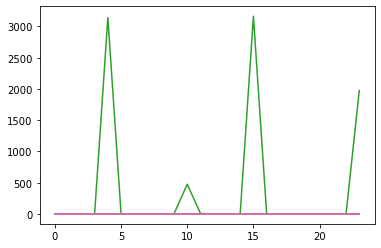

In [215]:
for i in range(len(array)):
    plt.plot(list(range(24)), array[i])

create dataframe with 3 columns (ID, day, hour)
drop duplicates
repeat for loop plotting

## Previous

In [59]:
date = EgoTimelines['created_at']

In [60]:
day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
DAY = []
N = 6
for i in range(N):
    date_i = date[date.str.contains(day[i])]
    DAY.append(date_i)

In [87]:
DAY[0].iloc[0]
#.find('10',11,12)

'Sun Jul 10 15:19:30 +0000 2011'

In [92]:
HOUR = []
hour = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']

for j in range(len(DAY)): #in Sun, Mon ...
    for i in range(len(DAY[j])): #in each time
        for k in range(24): 
            if DAY[j].iloc[i].find(hour[k],11,12) != -1:
                HOUR[k]=HOUR[k]+1

KeyboardInterrupt: 

KeyboardInterrupt: 

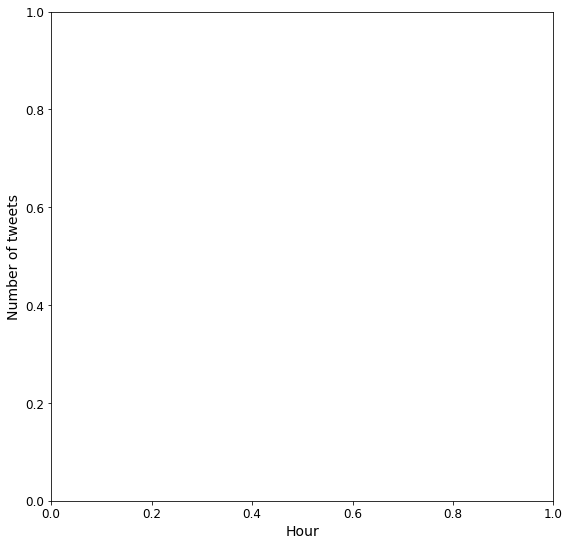

In [27]:
import matplotlib.pyplot as plt

#Plot time against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
#plt.minorticks_off()
plt.tick_params(axis='both', labelsize=12)

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink'] #set range of colours

for i in range(N):
    
    plt.plot(HOUR[i], color=colors[i], s=5, marker='o') #shift tweets by increment of 1


## Thomas

In [93]:
tweets = EgoTimelines

date = tweets['created_at']
date.head()
week_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

import numpy as np

array = np.zeros((7,24)) # creation of array saving the current count
errors = 0

for i in range (len(date)):
    day_i = date[i][:3]
    for k in range(0,7):
        if day_i == week_days[k]:
            id_day = k
        else:
            if k == 6:
                errors += 1
        
    hour_i = date[i][11:13]
    id_hour = int(hour_i)
    
    array[id_day][id_hour] = array[id_day][id_hour] + 1


In [ ]:
import matplotlib.pyplot as plt

#Plot time against Number of tweets
fig = plt.figure(figsize=(9,9))
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Number of tweets', fontsize=14)
#plt.minorticks_off()
plt.tick_params(axis='both', labelsize=12)

colors = ['coral', 'y', 'mediumseagreen', 'c', 'cornflowerblue', 'hotpink'] #set range of colours

for i in range(lend(date)):
    
    plt.plot(list(range[24]), array[i], color=colors[i], s=5, marker='o') #shift tweets by increment of 1
